In [238]:
%run functions.ipynb

In [2]:

P=500   
J=5
real_K_=4
MoyLCM=0  
Mass0=1.2   
N_tableaux=1000 

T, Types, theta, alpha_proportion, poids_0 = dataset_LCM(P, J, real_K_, MoyLCM, Mass0, N_tableaux)  # random poids in [0, 1]

# GENERATION Regressors and Dependent
result, X, Y = preprocess_dataset(T)   # c is a list, reach a float
print(f"\nMean of Reach across campaigns: {Y.mean(): .5f}\n")

T[0]


[[0.03990375 0.67690323 0.30571315 0.15055313 0.50729911]
 [0.58754203 0.33266954 0.34865881 0.85275963 0.80924345]
 [1.12040122 0.01088124 0.24238219 0.87487309 0.54908163]
 [0.6549343  1.11800704 0.16282297 0.8466423  0.94870036]] are the thresholds for sparsity 

[[1.40254561 0.56923032 2.33844386 1.10249209 2.44970673]
 [0.2636528  0.25008309 0.60577454 0.9979844  0.38700615]
 [1.09552019 6.06123034 3.0465456  1.971609   3.43166339]
 [3.61192607 0.6151839  1.4199244  5.240446   1.31232618]] are the parameters for the KxJ Poissons 

Execution time for preprocessing the dataset  is  0.0  h : 0.0  m : 16.69  s

Mean of Reach across campaigns:  0.82916



,users,J1,J2,J3,J4,J5
0,1,1,0,5,1,0
1,2,0,0,1,3,0
2,3,0,0,0,0,0
3,4,0,0,0,0,0
4,5,0,0,0,0,0
...,...,...,...,...,...,...
495,496,0,0,0,0,0
496,497,0,0,0,0,0
497,498,0,0,0,2,3
498,499,0,0,0,0,0


### Grid for number of additional centers (L) and variance (sigma) parameters

In [28]:
# Using stopping conditions and small threshold parameter

iter_=65

addit_grid = np.arange(start=3, stop=8, dtype=int)  # 6
variance_grid = np.round(np.arange(0.3, 1.7, 0.15), 2)  # 10

thresh_param = 1e-4   # epsilon thresh_param to be able to discard

r2_tot = np.zeros(shape=(len(addit_grid), len(variance_grid)))
rmse_tot = np.zeros(shape=(len(addit_grid), len(variance_grid)))
std_tot = np.zeros(shape=(len(addit_grid), len(variance_grid)))
# n. of rows is addit param, n. of columns is variance

X_tr, X_te_out, Y_tr, Y_te_out = train_test_split(X, Y, test_size=0.2, shuffle=True)   # keep 20% out for holdout sample (150 obs)



In [4]:

spl = 5
idx_addit = 0

for addit_param in addit_grid:
    idx_variance = 0
    for variance_param in variance_grid:
        
        kf = KFold(n_splits=spl, shuffle=True)        
        r2_st, rmse_st = [], []
        mean_r2, mean_rmse, std_r2 = 0, 0, 0
        
        for train_index, test_index in kf.split(X_tr):
            X_tr_in, X_te_in = X_tr[train_index], X_tr[test_index]
            Y_tr_in, Y_te_in = Y_tr[train_index], Y_tr[test_index]

            alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr_in, Y_tr_in, iter_, addit_param, 
                                                                              variance_param, threshold=thresh_param, 
                                                                              _print_=False, compute_r2=[X_te_in, Y_te_in])
            r2_st.append(metrics[-1][0])
            rmse_st.append(metrics[-1][1])
            
        mean_r2 = np.array(r2_st).mean()
        mean_rmse = np.array(rmse_st).mean()
        std_r2 = np.std(np.array(r2_st))
        print(f"L param: {addit_param}, Var param: {variance_param} \t -> \t R2 (avg.): {mean_r2: .5%},  (std.): {std_r2: .5f}")
        
        if variance_param==variance_grid[-1]:
            print("")
        
        r2_tot[idx_addit, idx_variance] = mean_r2
        rmse_tot[idx_addit, idx_variance] = mean_rmse
        std_tot[idx_addit, idx_variance] = std_r2
        
        idx_variance += 1
    idx_addit += 1


L param: 3, Var param: 0.3 	 -> 	 R2 (avg.):  5.39794%,  (std.):  0.14289
L param: 3, Var param: 0.45 	 -> 	 R2 (avg.):  18.72139%,  (std.):  0.11157
L param: 3, Var param: 0.6 	 -> 	 R2 (avg.):  17.11187%,  (std.):  0.12105
L param: 3, Var param: 0.75 	 -> 	 R2 (avg.):  20.13398%,  (std.):  0.06230
L param: 3, Var param: 0.9 	 -> 	 R2 (avg.):  18.40187%,  (std.):  0.07574
L param: 3, Var param: 1.05 	 -> 	 R2 (avg.):  19.25987%,  (std.):  0.08163
L param: 3, Var param: 1.2 	 -> 	 R2 (avg.):  10.48061%,  (std.):  0.17800
L param: 3, Var param: 1.35 	 -> 	 R2 (avg.):  14.61878%,  (std.):  0.09208
L param: 3, Var param: 1.5 	 -> 	 R2 (avg.):  3.60916%,  (std.):  0.23074
L param: 3, Var param: 1.65 	 -> 	 R2 (avg.):  11.97564%,  (std.):  0.11467

L param: 4, Var param: 0.3 	 -> 	 R2 (avg.):  5.73924%,  (std.):  0.13010
L param: 4, Var param: 0.45 	 -> 	 R2 (avg.):  26.50509%,  (std.):  0.05445
L param: 4, Var param: 0.6 	 -> 	 R2 (avg.):  19.15876%,  (std.):  0.09588
L param: 4, Var param

In [5]:
r2_tot

array([[ 0.05397942,  0.18721388,  0.17111866,  0.20133977,  0.18401873,
         0.19259874,  0.10480611,  0.14618775,  0.0360916 ,  0.11975639],
       [ 0.05739239,  0.26505094,  0.19158755,  0.17489026,  0.16432482,
         0.13961186,  0.19457763,  0.09107987, -0.02214674, -0.09895907],
       [ 0.21737398,  0.21211439,  0.26038469,  0.21991974,  0.22331468,
         0.07271375,  0.16006447,  0.20102745,  0.1910311 ,  0.07885841],
       [ 0.18113581,  0.25219312,  0.24476851,  0.223209  ,  0.20835848,
         0.22758516,  0.18991552,  0.17435563,  0.06771658, -0.33406655],
       [ 0.19703186,  0.23701063,  0.23678123,  0.24037208,  0.20461125,
         0.20547066,  0.2178594 , -0.05687805,  0.18077946,  0.07837017]])

In [6]:
rmse_tot

array([[0.01621725, 0.01505577, 0.01520888, 0.01496577, 0.01503487,
        0.01505498, 0.01562025, 0.01542339, 0.01632859, 0.01558805],
       [0.01617597, 0.01433048, 0.01496735, 0.01511735, 0.01529767,
        0.01543132, 0.01498897, 0.01583752, 0.01667762, 0.01732233],
       [0.0147817 , 0.01478711, 0.01440357, 0.0146967 , 0.01475052,
        0.01599814, 0.01533593, 0.01496092, 0.01503929, 0.0160554 ],
       [0.01515945, 0.01446927, 0.01455342, 0.01475378, 0.01489585,
        0.014632  , 0.01497368, 0.01520685, 0.01615801, 0.01854179],
       [0.01500151, 0.01462276, 0.01457061, 0.01456337, 0.01489496,
        0.01490862, 0.0147985 , 0.01690631, 0.01513386, 0.01595477]])

In [54]:
# Index of optimal values of additional centers and variance parameter for R2 and RMSE

print(np.where(r2_tot==np.amax(r2_tot)))
print(np.where(rmse_tot==np.amin(rmse_tot)))

(array([1]), array([1]))
(array([1]), array([1]))


In [63]:
addit_grid = np.arange(start=3, stop=8, dtype=int)  # 6
variance_grid = np.round(np.arange(0.3, 1.7, 0.15), 2)  # 10
print(f"\nThe optimal parameters coincide for R^2 and RMSE, and they are equal to: \n")
print(f"Number of additional centers: {addit_grid[np.where(r2_tot==np.amax(r2_tot))[0]]}, Variance parameter: {variance_grid[np.where(r2_tot==np.amax(r2_tot))[1]]}\n")
print(f"\nLinked with an average estimated R2 score equal to {np.amax(r2_tot): .5%} and an RMSE equal to {np.amin(rmse_tot): .5f}\n")
print(f"The estimated standard deviation of the R2 scores across the 5-fold CV is: {std_tot[np.where(r2_tot==np.amax(r2_tot))][0]: .5f}\n")



The optimal parameters coincide for R^2 and RMSE, and they are equal to: 

Number of additional centers: [4], Variance parameter: [0.45]


Linked with an average estimated R2 score equal to  26.50509% and an RMSE equal to  0.01433

The estimated standard deviation of the R2 scores across the 5-fold CV is:  0.05445



### Grid for threshold parameter

In [100]:

best_addit = addit_grid[np.where(r2_tot==np.amax(r2_tot))[0]][0]
best_variance = variance_grid[np.where(r2_tot==np.amax(r2_tot))[1]][0]

thresh_grid = np.concatenate((np.logspace(start=-4, stop=-1, num=8), np.array([0.15, None])))  # 12
r2_tot = np.zeros((len(thresh_grid)))
rmse_tot = np.zeros((len(thresh_grid)))
std_tot = np.zeros((len(thresh_grid)))


In [101]:

spl = 5
idx_thresh = 0

for thresh_param in thresh_grid:
    kf = KFold(n_splits=spl, shuffle=True)        
    r2_st, rmse_st = [], []

    for train_index, test_index in kf.split(X_tr):
        X_tr_in, X_te_in = X_tr[train_index], X_tr[test_index]
        Y_tr_in, Y_te_in = Y_tr[train_index], Y_tr[test_index]

        alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr_in, Y_tr_in, iter_, best_addit, 
                                                                          best_variance, threshold=thresh_param, 
                                                                          _print_=False, compute_r2=[X_te_in, Y_te_in])
        r2_st.append(metrics[-1][0])
        rmse_st.append(metrics[-1][1])
            
    mean_r2 = np.array(r2_st).mean()
    mean_rmse = np.array(rmse_st).mean()
    std_r2 = np.std(np.array(r2_st))
    print(f"Thresh param: {thresh_param} \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")

    r2_tot[idx_thresh] = mean_r2
    rmse_tot[idx_thresh] = mean_rmse
    std_tot[idx_thresh] = std_r2

    idx_thresh += 1


Thresh param: 0.0001 	 -> 	 R2 (avg.):  17.18344%, RMSE (avg.):  0.01437, (std.):  0.05175

Thresh param: 0.00026826957952797245 	 -> 	 R2 (avg.):  25.55793%, RMSE (avg.):  0.01365, (std.):  0.02183

Thresh param: 0.0007196856730011522 	 -> 	 R2 (avg.):  12.76503%, RMSE (avg.):  0.01471, (std.):  0.14285

Thresh param: 0.0019306977288832496 	 -> 	 R2 (avg.):  14.02144%, RMSE (avg.):  0.01459, (std.):  0.12635

Thresh param: 0.005179474679231213 	 -> 	 R2 (avg.):  18.05724%, RMSE (avg.):  0.01429, (std.):  0.01917

Thresh param: 0.013894954943731374 	 -> 	 R2 (avg.):  19.60053%, RMSE (avg.):  0.01414, (std.):  0.02740

Thresh param: 0.03727593720314938 	 -> 	 R2 (avg.): -128.23159%, RMSE (avg.):  0.02272, (std.):  1.24409

Thresh param: 0.1 	 -> 	 R2 (avg.): -140.71245%, RMSE (avg.):  0.02436, (std.):  0.74611

Thresh param: 0.15 	 -> 	 R2 (avg.): -10.45209%, RMSE (avg.):  0.01654, (std.):  0.20850

Thresh param: None 	 -> 	 R2 (avg.):  18.73886%, RMSE (avg.):  0.01423, (std.):  0.07588

In [115]:
# Finer grid

thresh_grid = np.concatenate((np.linspace(0.0001, 0.001, 5), np.array([None])))

r2_tot = np.zeros((len(thresh_grid)))
rmse_tot = np.zeros((len(thresh_grid)))
std_tot = np.zeros((len(thresh_grid)))

spl = 3
idx_thresh = 0

for thresh_param in thresh_grid:
    kf = KFold(n_splits=spl, shuffle=True)        
    r2_st, rmse_st = [], []

    for train_index, test_index in kf.split(X_tr):
        X_tr_in, X_te_in = X_tr[train_index], X_tr[test_index]
        Y_tr_in, Y_te_in = Y_tr[train_index], Y_tr[test_index]

        alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr_in, Y_tr_in, iter_, best_addit, 
                                                                          best_variance, threshold=thresh_param, 
                                                                          _print_=False, compute_r2=[X_te_in, Y_te_in])
        r2_st.append(metrics[-1][0])
        rmse_st.append(metrics[-1][1])
            
    mean_r2 = np.array(r2_st).mean()
    mean_rmse = np.array(rmse_st).mean()
    std_r2 = np.std(np.array(r2_st))
    if thresh_param!=None:
        print(f"Thresh param: {np.around(thresh_param, 4)} \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")
    else:
        print(f"Adaptive thresh parameter: \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")
 
    r2_tot[idx_thresh] = mean_r2
    rmse_tot[idx_thresh] = mean_rmse
    std_tot[idx_thresh] = std_r2

    idx_thresh += 1


Thresh param: 0.0001 	 -> 	 R2 (avg.):  28.14473%, RMSE (avg.):  0.01341, (std.):  0.02969

Thresh param: 0.0003 	 -> 	 R2 (avg.):  14.35608%, RMSE (avg.):  0.01462, (std.):  0.14892

Thresh param: 0.0006 	 -> 	 R2 (avg.):  24.31185%, RMSE (avg.):  0.01374, (std.):  0.06028

Thresh param: 0.0008 	 -> 	 R2 (avg.):  18.77034%, RMSE (avg.):  0.01417, (std.):  0.15819

Thresh param: 0.001 	 -> 	 R2 (avg.):  23.50663%, RMSE (avg.):  0.01383, (std.):  0.05655

Adaptive thresh parameter: 	 -> 	 R2 (avg.):  18.05963%, RMSE (avg.):  0.01431, (std.):  0.08707



In [116]:
# Finest grid

thresh_grid = np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006])

r2_tot = np.zeros((len(thresh_grid)))
rmse_tot = np.zeros((len(thresh_grid)))
std_tot = np.zeros((len(thresh_grid)))

spl = 3
idx_thresh = 0

for thresh_param in thresh_grid:
    kf = KFold(n_splits=spl, shuffle=True)        
    r2_st, rmse_st = [], []

    for train_index, test_index in kf.split(X_tr):
        X_tr_in, X_te_in = X_tr[train_index], X_tr[test_index]
        Y_tr_in, Y_te_in = Y_tr[train_index], Y_tr[test_index]

        alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr_in, Y_tr_in, iter_, best_addit, 
                                                                          best_variance, threshold=thresh_param, 
                                                                          _print_=False, compute_r2=[X_te_in, Y_te_in])
        r2_st.append(metrics[-1][0])
        rmse_st.append(metrics[-1][1])
            
    mean_r2 = np.array(r2_st).mean()
    mean_rmse = np.array(rmse_st).mean()
    std_r2 = np.std(np.array(r2_st))
    if thresh_param!=None:
        print(f"Thresh param: {np.around(thresh_param, 4)} \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")
    else:
        print(f"Adaptive thresh parameter: \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")
 
    r2_tot[idx_thresh] = mean_r2
    rmse_tot[idx_thresh] = mean_rmse
    std_tot[idx_thresh] = std_r2

    idx_thresh += 1


Thresh param: 0.001 	 -> 	 R2 (avg.):  23.24857%, RMSE (avg.):  0.01382, (std.):  0.02297

Thresh param: 0.002 	 -> 	 R2 (avg.):  23.21031%, RMSE (avg.):  0.01386, (std.):  0.07478

Thresh param: 0.003 	 -> 	 R2 (avg.):  12.40660%, RMSE (avg.):  0.01480, (std.):  0.04869

Thresh param: 0.004 	 -> 	 R2 (avg.):  17.79934%, RMSE (avg.):  0.01429, (std.):  0.13594

Thresh param: 0.005 	 -> 	 R2 (avg.):  15.47624%, RMSE (avg.):  0.01449, (std.):  0.05120

Thresh param: 0.006 	 -> 	 R2 (avg.): -13.22092%, RMSE (avg.):  0.01660, (std.):  0.26014



In [118]:
# Finest grid

thresh_param = np.array([0.00026826])

spl = 3
idx_thresh = 0

kf = KFold(n_splits=spl, shuffle=True)        
r2_st, rmse_st = [], []

for train_index, test_index in kf.split(X_tr):
    X_tr_in, X_te_in = X_tr[train_index], X_tr[test_index]
    Y_tr_in, Y_te_in = Y_tr[train_index], Y_tr[test_index]

    alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr_in, Y_tr_in, iter_, best_addit, 
                                                                      best_variance, threshold=thresh_param, 
                                                                      _print_=False, compute_r2=[X_te_in, Y_te_in])
    r2_st.append(metrics[-1][0])
    rmse_st.append(metrics[-1][1])

mean_r2 = np.array(r2_st).mean()
mean_rmse = np.array(rmse_st).mean()
std_r2 = np.std(np.array(r2_st))
if thresh_param!=None:
    print(f"Thresh param: {np.around(thresh_param, 4)} \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")
else:
    print(f"Adaptive thresh parameter: \t -> \t R2 (avg.): {mean_r2: .5%}, RMSE (avg.): {mean_rmse: .5f}, (std.): {std_r2: .5f}\n")    


Thresh param: [0.0003] 	 -> 	 R2 (avg.):  25.37402%, RMSE (avg.):  0.01363, (std.):  0.04987



In [189]:
# We fix and evaluate on Holdout dataset
# X_tr, X_te_out, Y_tr, Y_te_out at the beginning

iter_ = 100  # with stopping condition
best_thresh = 0.00026826

alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr, Y_tr, iter_, best_addit, 
                                                                  best_variance, best_thresh, 
                                                                  _print_=False, compute_r2=[X_te_out, Y_te_out]) 


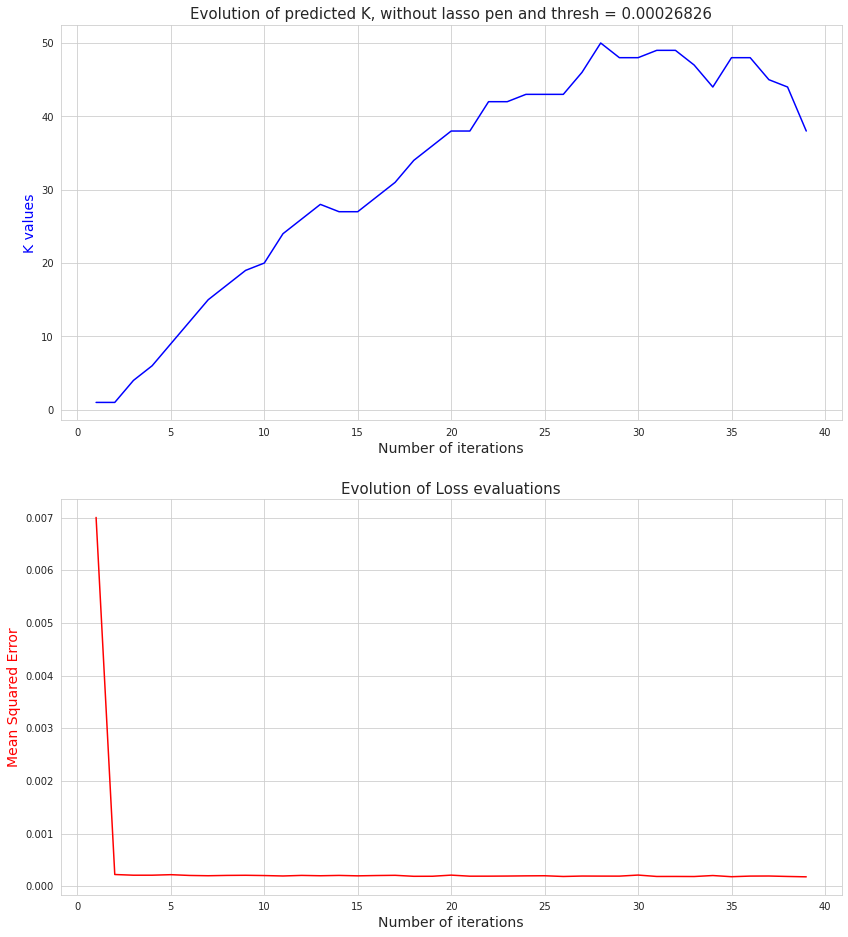

In [193]:
fig = plot_ADM(K_pred, fun_eval, thresh=best_thresh, lasso=0) 
fig.savefig('images/Google_opt_loss.jpg', bbox_inches='tight', dpi=300)

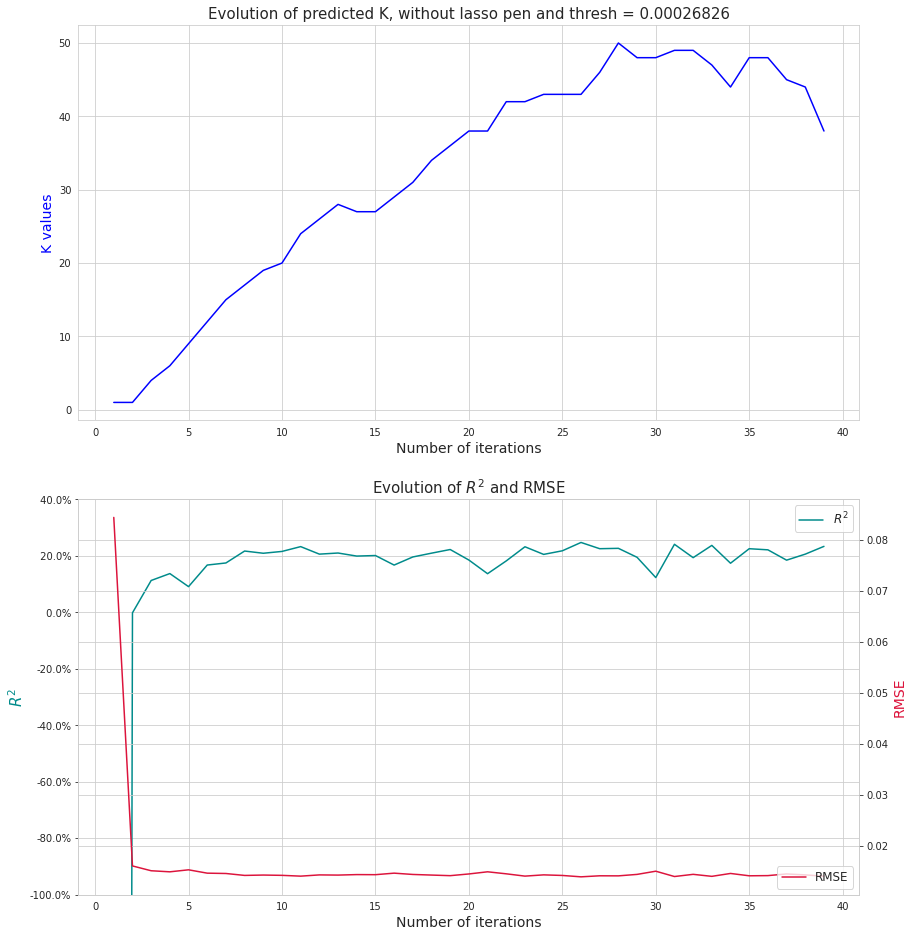

In [194]:
fig = plot_ADM(K_pred, fun_eval, thresh=best_thresh, lasso=0, r2_ls=metrics) 
fig.savefig('images/Google_opt_metrics.jpg', bbox_inches='tight', dpi=300)


The R2 score is:  23.38752% ----- The RMSE is: 0.014035276836337488 ----- 



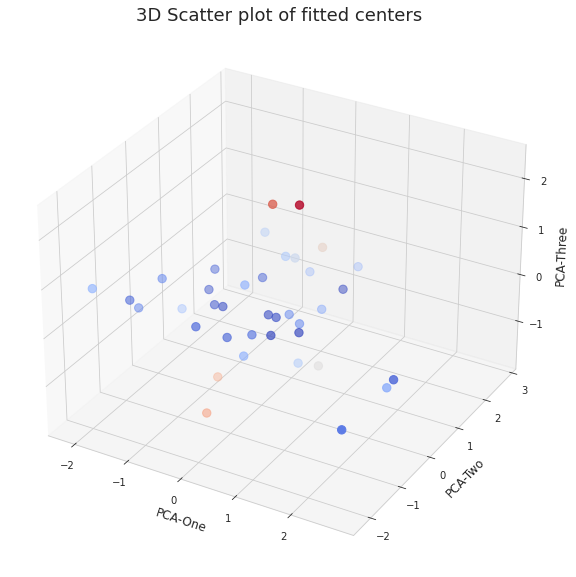

In [198]:
preds, r2, rmse = eval_ADM(K_pred, alpha_pred, centers, X_te_out, 
                           Y_te_out, plot_='Google_scatter_centers_opt', print_=True, 
                           real_K=real_K_, real_alph=alpha_proportion)

In [206]:
# Without stopping conditions and threshold 
# (I re-ran the functions without stopping conditions), a parameter is 
# not implemented but easy to do

iter_ = 50  # with stopping condition
thresh_param = 1e-10  # almost ienxistent

alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr, Y_tr, iter_, best_addit, 
                                                                  best_variance, thresh_param, 
                                                                  _print_=False, compute_r2=[X_te_out, Y_te_out])




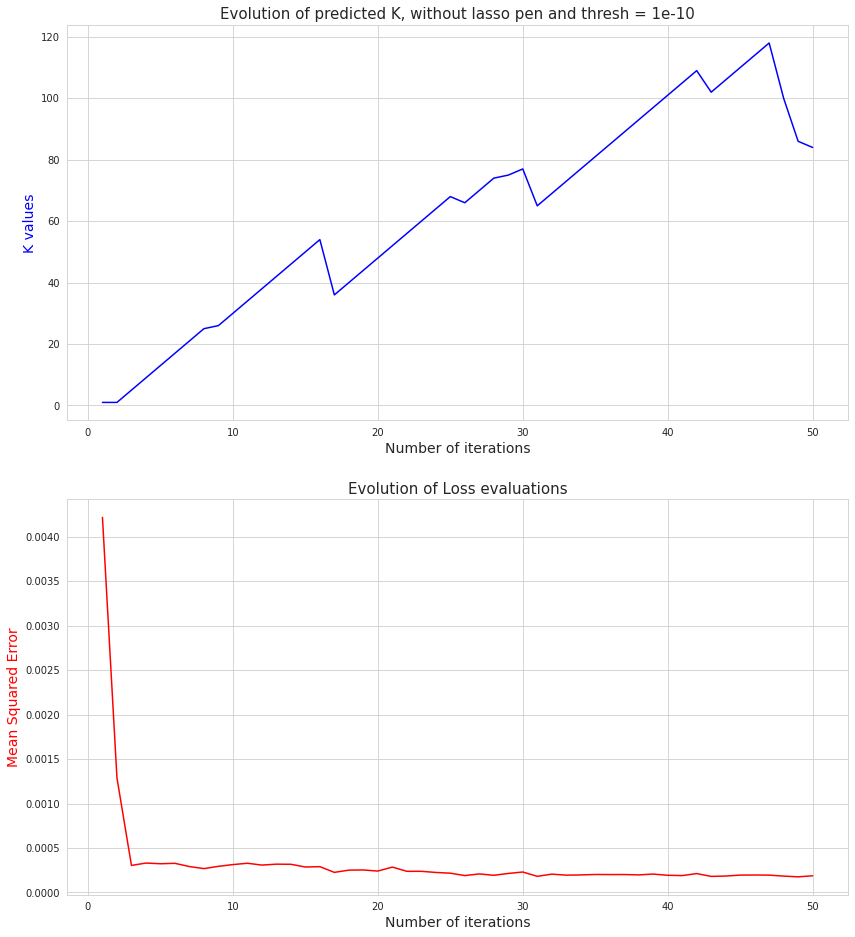

In [207]:
fig = plot_ADM(K_pred, fun_eval, thresh=thresh_param, lasso=0) 
fig.savefig('images/Google_without_loss.jpg', bbox_inches='tight', dpi=300)


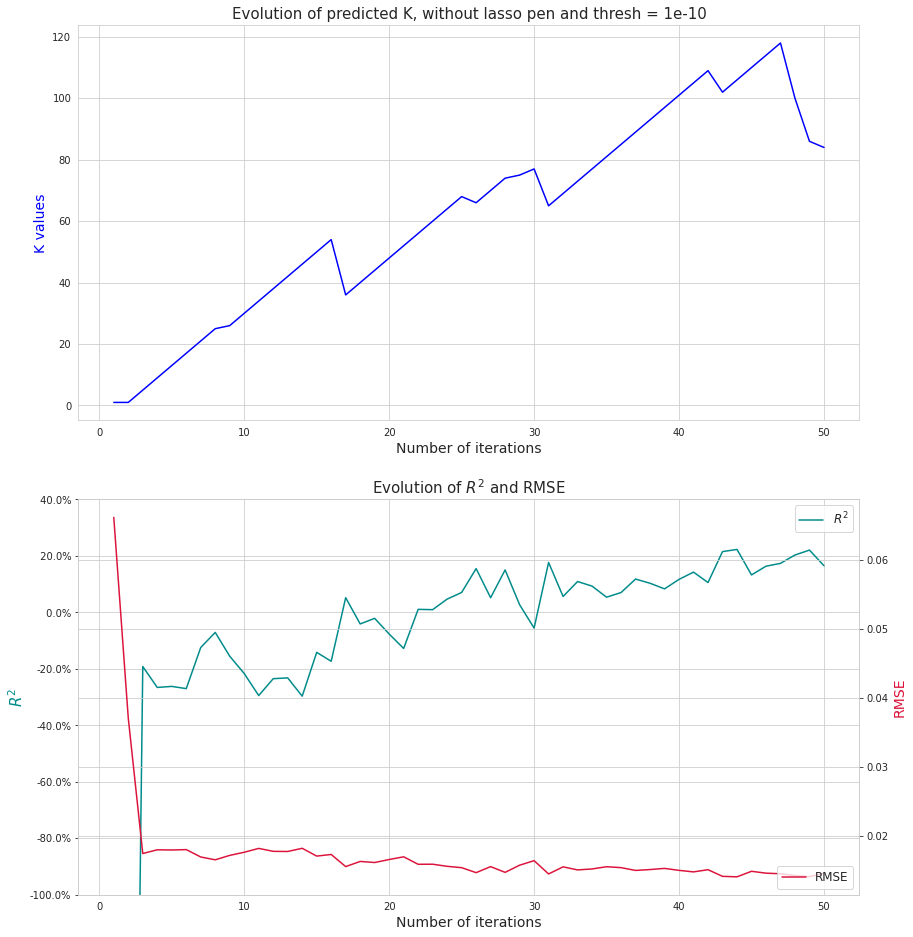

In [208]:
fig = plot_ADM(K_pred, fun_eval, thresh=thresh_param, lasso=0, r2_ls=metrics) 
fig.savefig('images/Google_without_metrics.jpg', bbox_inches='tight', dpi=300)


The R2 score is:  16.53206% ----- The RMSE is: 0.014649778628766263 ----- 



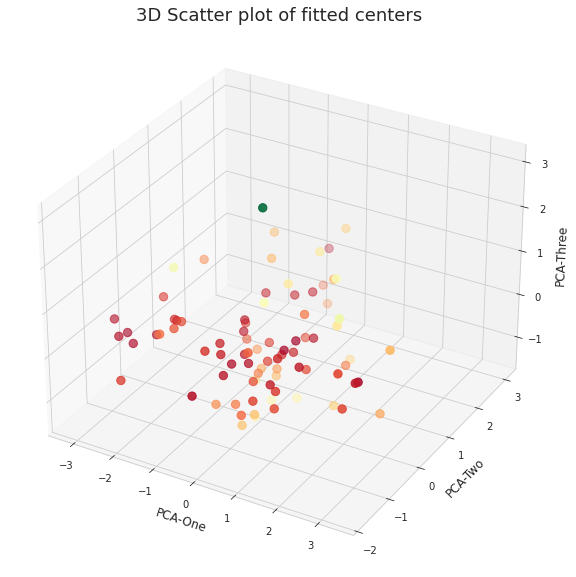

In [210]:
preds, r2, rmse = eval_ADM(K_pred, alpha_pred, centers, X_te_out, 
                           Y_te_out, plot_='Google_scatter_centers_without', print_=True, 
                           real_K=real_K_, real_alph=alpha_proportion)

In [217]:
# BAD INITIALIZATION WITH NO STOPPING

iter_ = 50
thresh_param = 0.001
addit_param = 6
variance_param = 1.2

alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr, Y_tr, iter_, addit_param, 
                                                                  variance_param, thresh_param, 
                                                                  _print_=False, compute_r2=[X_te_out, Y_te_out]) 


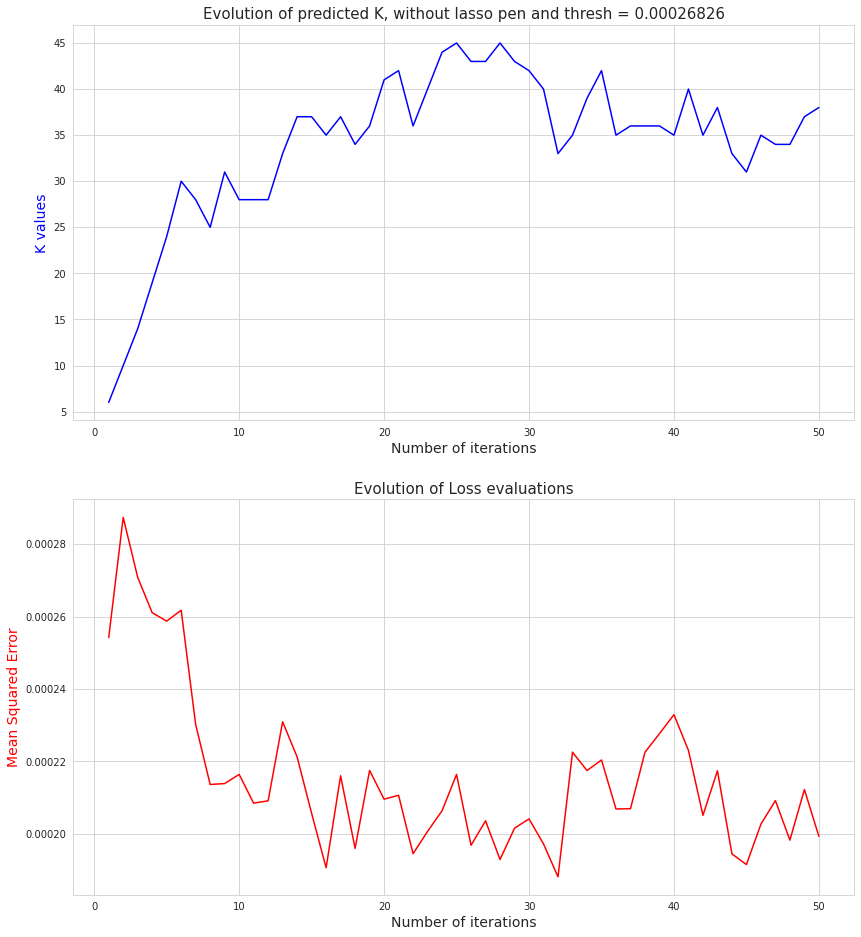

In [225]:
fig = plot_ADM(K_pred, fun_eval, thresh=best_thresh, lasso=0) 
fig.savefig('images/Google_bad_loss.jpg', bbox_inches='tight', dpi=300)

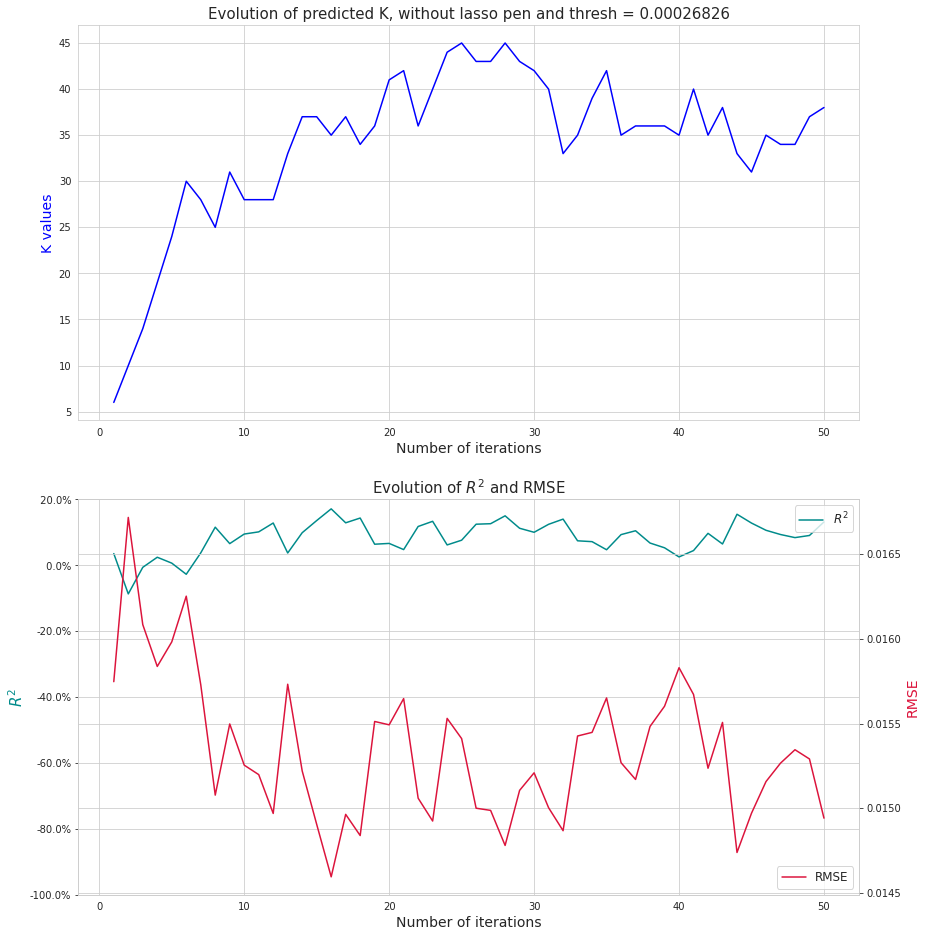

In [226]:
fig = plot_ADM(K_pred, fun_eval, thresh=best_thresh, lasso=0, r2_ls=metrics) 
fig.savefig('images/Google_bad_metrics.jpg', bbox_inches='tight', dpi=300)


The R2 score is:  13.17084% ----- The RMSE is: 0.014941837605628448 ----- 



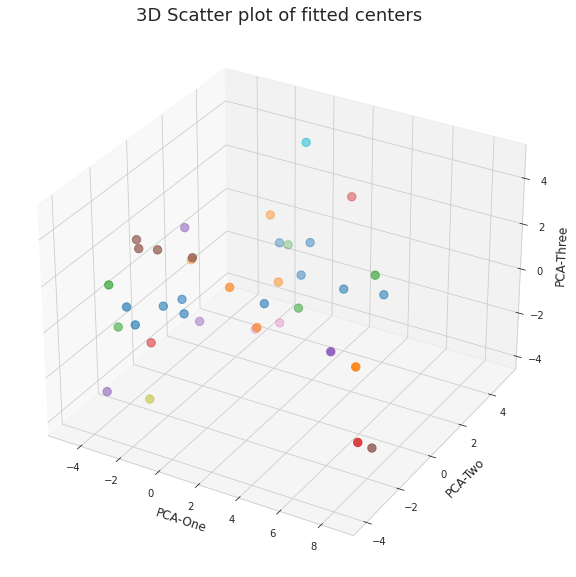

In [237]:
preds, r2, rmse = eval_ADM(K_pred, alpha_pred, centers, X_te_out, 
                           Y_te_out, print_=True, plot_='Google_scatter_centers_bad',
                           real_K=real_K_, real_alph=alpha_proportion)

In [211]:
# Tried Lasso: implementation with alphas both + and - such that sum(abs(alphas))=1
# DOES NOT WORK !!!!

iter_ = 60  # with stopping condition
thresh_param = 0  # without
lasso_param = 1e-2

alpha_pred, centers, K_pred, fun_eval, metrics, thresh_list = ADM(X_tr, Y_tr, iter_, best_addit, 
                                                                  best_variance, thresh_param, lasso=lasso_param, 
                                                                  _print_=True, compute_r2=[X_te_out, Y_te_out])


# does not work


 	 	 ITER 1
Execution time for minimization  is  0.0  h : 0.0  m : 1.06  s

LOSS evaluation (without lasso penalization): 0.00018701219536610553
Considered centers: 4
Discarded centers: 1

The R2 score is: -3804.46691% ----- The RMSE is: 0.10019639511590885 ----- 


 	 	 ITER 2
Execution time for minimization  is  0.0  h : 0.0  m : 1.41  s

LOSS evaluation (without lasso penalization): 0.00019011122842095898
Considered centers: 7
Discarded centers: 1

The R2 score is: -4139.26047% ----- The RMSE is: 0.10440379233000187 ----- 


 	 	 ITER 3
Execution time for minimization  is  0.0  h : 0.0  m : 6.06  s

LOSS evaluation (without lasso penalization): 0.000180964119033589
Considered centers: 10
Discarded centers: 1

The R2 score is: -2969.06702% ----- The RMSE is: 0.08883301648168744 ----- 


 	 	 ITER 4
Execution time for minimization  is  0.0  h : 0.0  m : 5.31  s

LOSS evaluation (without lasso penalization): 0.00018503699566899123
Considered centers: 10
Discarded centers: 4

The R2 sc